## Project_Stock Market Analysis

This project will take a look at the data from the stock market, focusing on some technology stocks. Pandas will be used to gather stock information and seaborn will be used to visualize different aspects of it. In the end, some ways of analyzing risks will be presented based on historical performance. A Monte Carlo simuation will be used to predict the future.

The following questions will be answered:

1.) What was the change in price of the stock over time? 

2.) What was the moving average of the various stocks? 

3.) What was the daily return of the stock on average? 

4.) What was the correlation between different stocks' daily returns and closing prices? 

5.) How much value do we put at risk by investing in a particular stock? 

6.) How can we attempt to predict future stock behavior? 

In [1]:
# imports for data analysis
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# for reading stocks info from yahoo
from pandas_datareader import data

# for time stamps
from datetime import datetime

# for division
from __future__ import division

In [2]:
# tech stocks selected
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# set up end and start time for data grab
end = datetime.now()
start = datetime(end.year-1, end.month, end.day) 

for stock in tech_list:  
    # set dataframe as the stock ticker
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [3]:
# stock summary statistics
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,104.485771,105.399921,103.662134,104.573004,3.837282e+07,103.552233
std,7.538312,7.506270,7.633157,7.594742,1.707814e+07,7.980574
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.320000,98.209999,96.580002,97.139999,2.693260e+07,95.855921
50%,105.519997,106.309998,104.820000,105.709999,3.368680e+07,104.176902
75%,110.309998,111.459999,109.550003,110.879997,4.439280e+07,110.196190
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [4]:
# stock info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-30 to 2016-12-29
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


### Q1. What was the change in price of the stock over time?

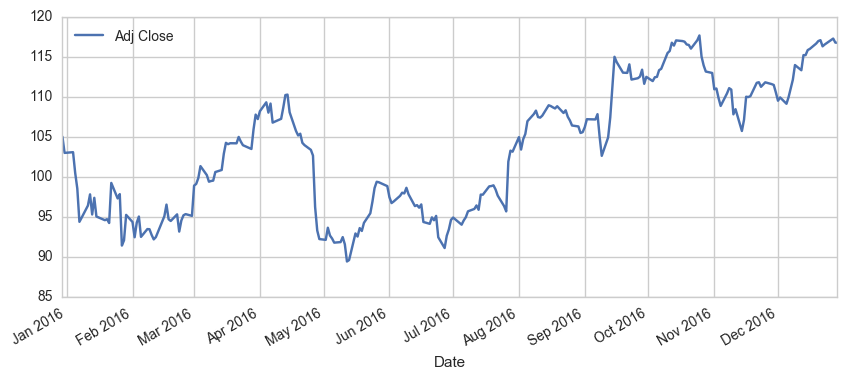

In [5]:
# historical view of stock price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

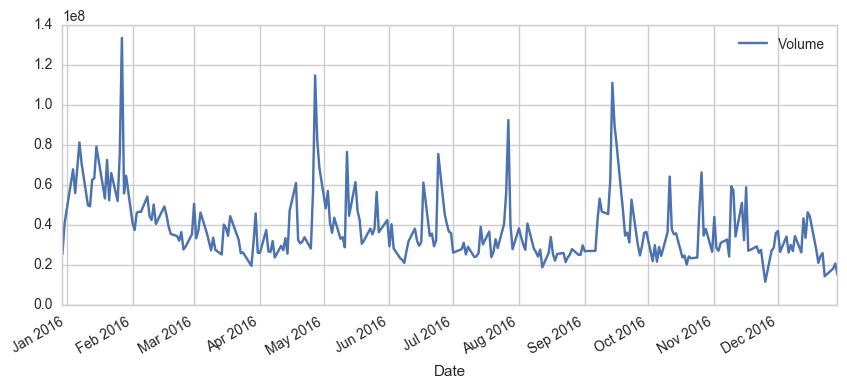

In [6]:
# total volume of the stock being traded every day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

### Q2. What was the moving average of the various stocks?

In [7]:
# moving average price of the stock

# 3 kinds of moving averages
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma, center=False).mean()    
    # anothor way for calculating MA: pd.rolling_mean(AAPL['Adj Close'], ma)  

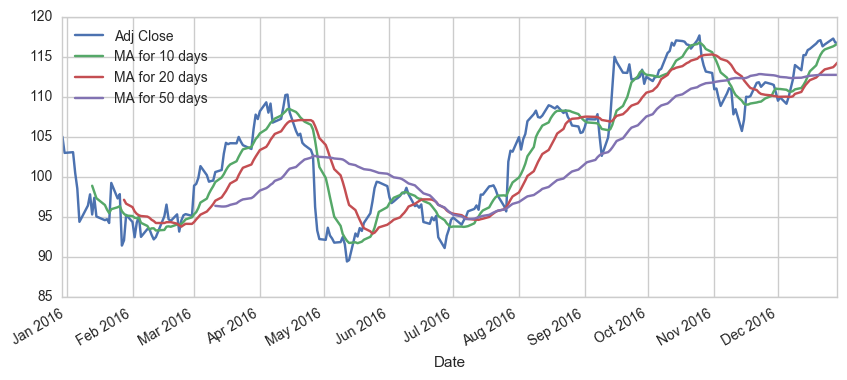

In [8]:
# plot all the moving averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

### Q3. What was the daily return of the stock on average?

In [9]:
# use pct_change() to find the percentage change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# quick view of the return column
AAPL['Daily Return'].head(10)

Date
2015-12-30         NaN
2015-12-31   -0.019195
2016-01-04    0.000855
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
2016-01-12    0.014513
2016-01-13   -0.025710
Name: Daily Return, dtype: float64

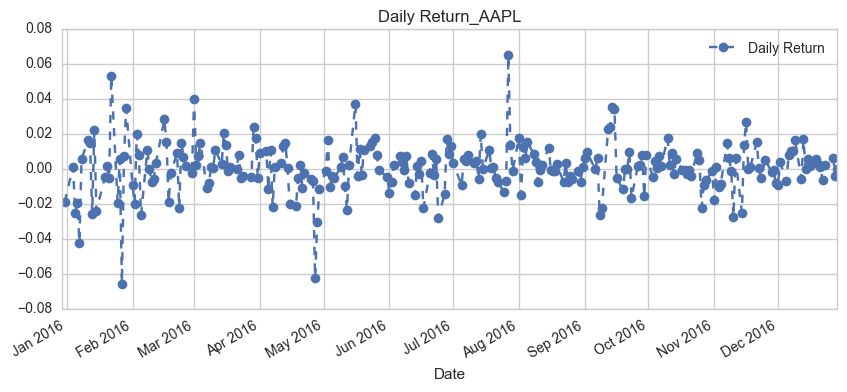

In [10]:
# plot the daily return pct
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')
plt.title('Daily Return_AAPL')

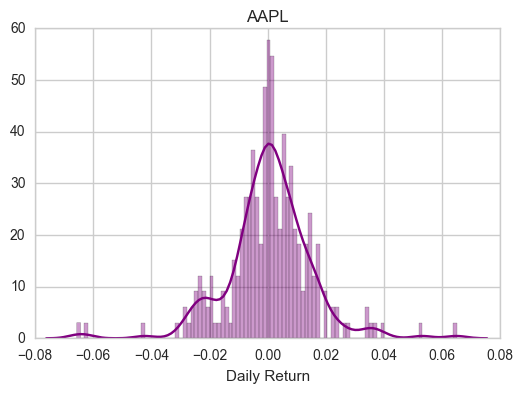

In [11]:
# use seaborn.distplot() to combine histogram and kdeplot
# use dropna() here otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')
plt.title('AAPL')

Next we will see the combination of returns for all the stocks.

In [12]:
# dataframe of closing prices for all the stocks
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [13]:
# quick view of the dataframe
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-30,104.984187,689.070007,771.000000,54.806110
2015-12-31,102.969025,675.890015,758.880005,53.998276
2016-01-04,103.057063,636.989990,741.840027,53.336436
2016-01-05,100.474523,633.789978,742.580017,53.579760
2016-01-06,98.508268,632.650024,743.619995,52.606467


In [14]:
# dailiy returns for all the stocks
tech_ret = closing_df.pct_change()

# quick view of the returns
tech_ret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-30,NaN,NaN,NaN,NaN
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165


The plots below are to check the relationship between two stocks .

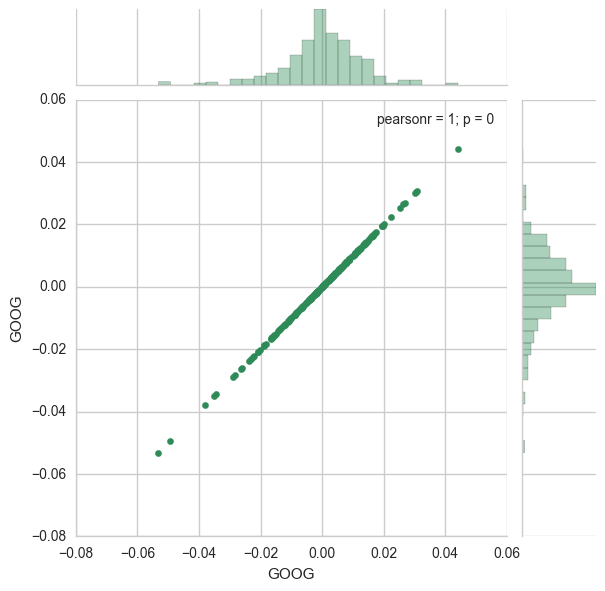

In [15]:
# first to compare a stock's return with itself 
sns.jointplot('GOOG','GOOG', tech_ret, kind='scatter', color='seagreen') 

The comparison between a stock and itself should show perfect linear relationship.

### Q4. What was the correlation between different stocks' daily returns?

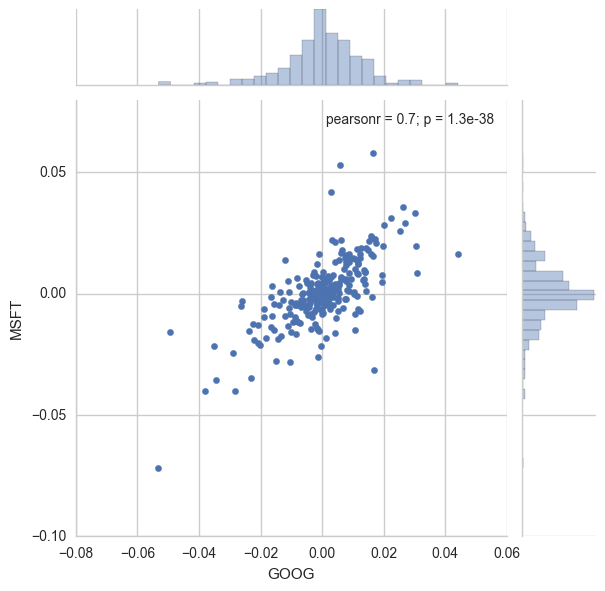

In [16]:
# compare two different stocks
sns.jointplot('GOOG','MSFT',tech_ret, kind='scatter')

The pearsonr value (officially known as the Pearson product-moment correlation coefficient) which is 0.7 shows a high linear relationship between GOOG and MSFT. 

A quick intuitive sense of the linear relationship shown in the pictures below.

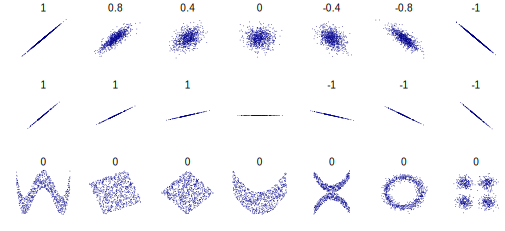

In [17]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

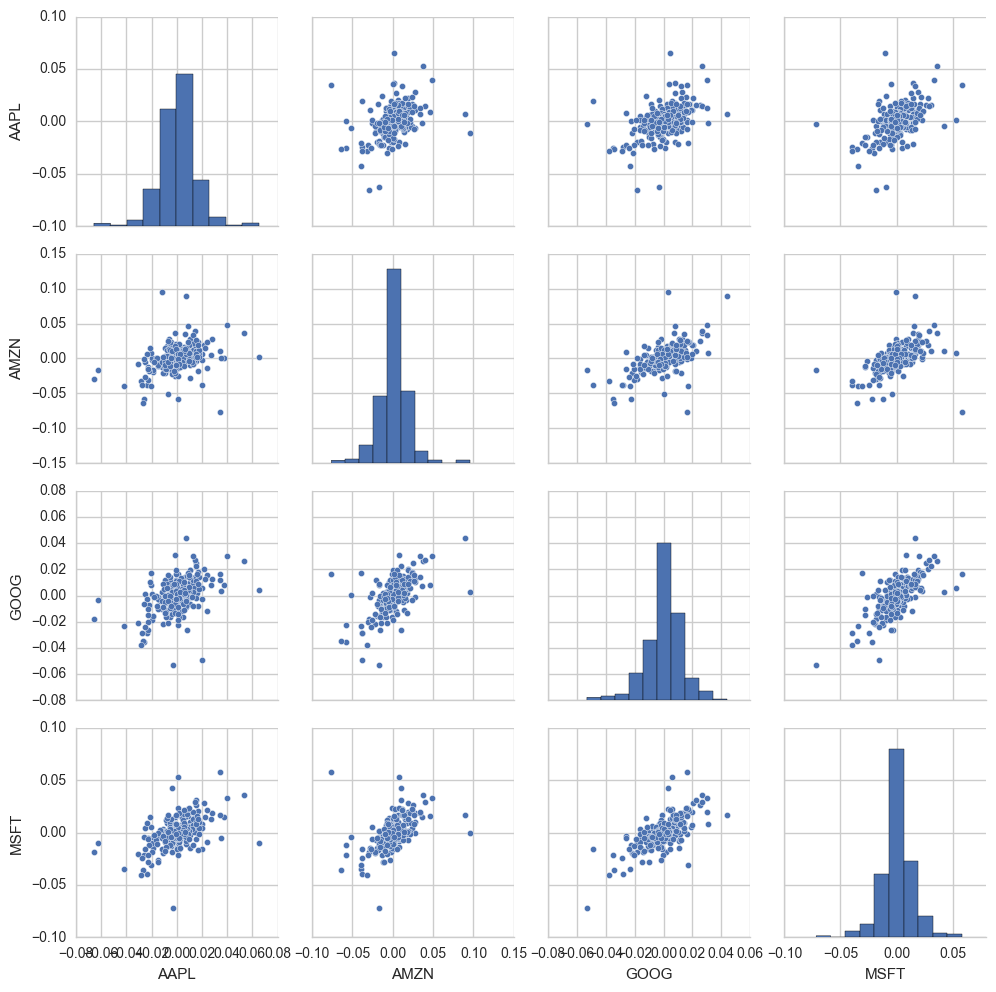

In [18]:
# use seaborn.pairplot to visualize all the comparisons
sns.pairplot(tech_ret.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows that among all the comparisons, there is a higher degree of linearity between GOOG and MSFT. 

Another choice for plotting all the comparisons is to use PairGrid().

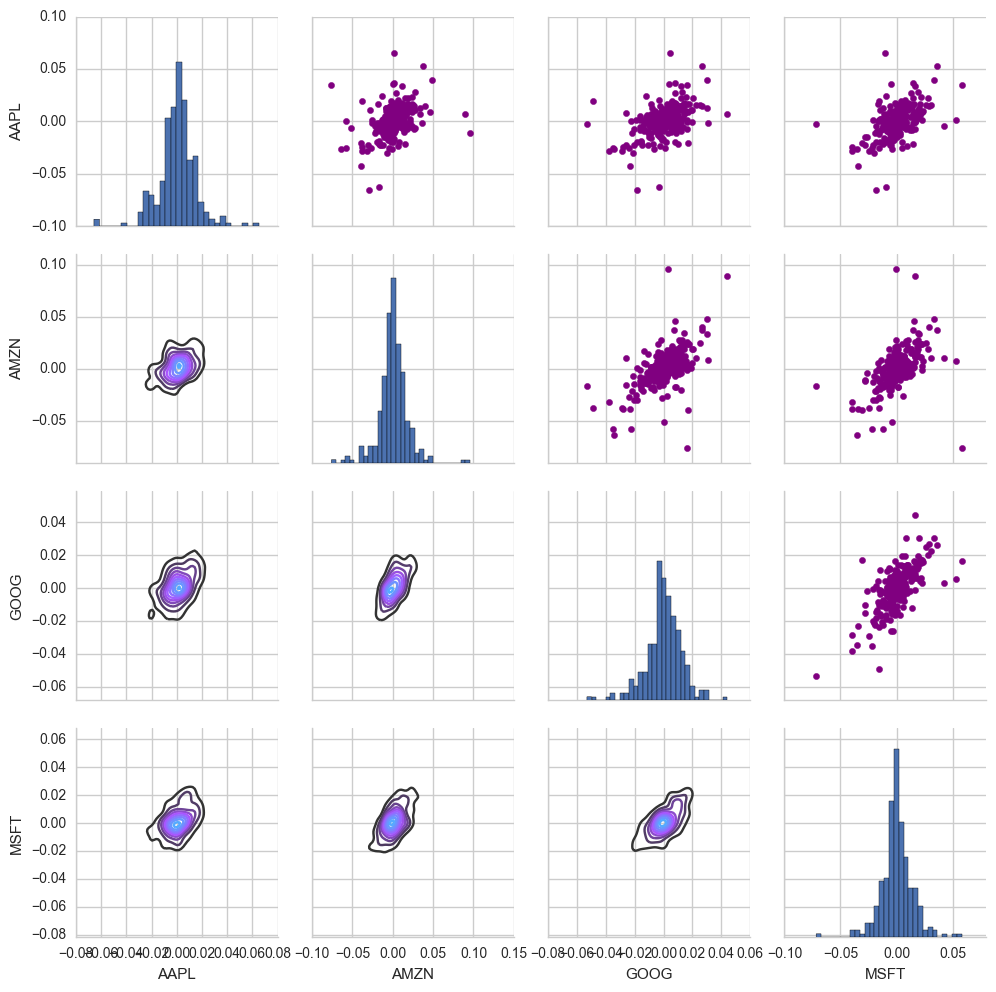

In [19]:
# set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_ret.dropna())

# use map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color='purple')

# define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# finally define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Below are the plots for all the comparison of closing price. 

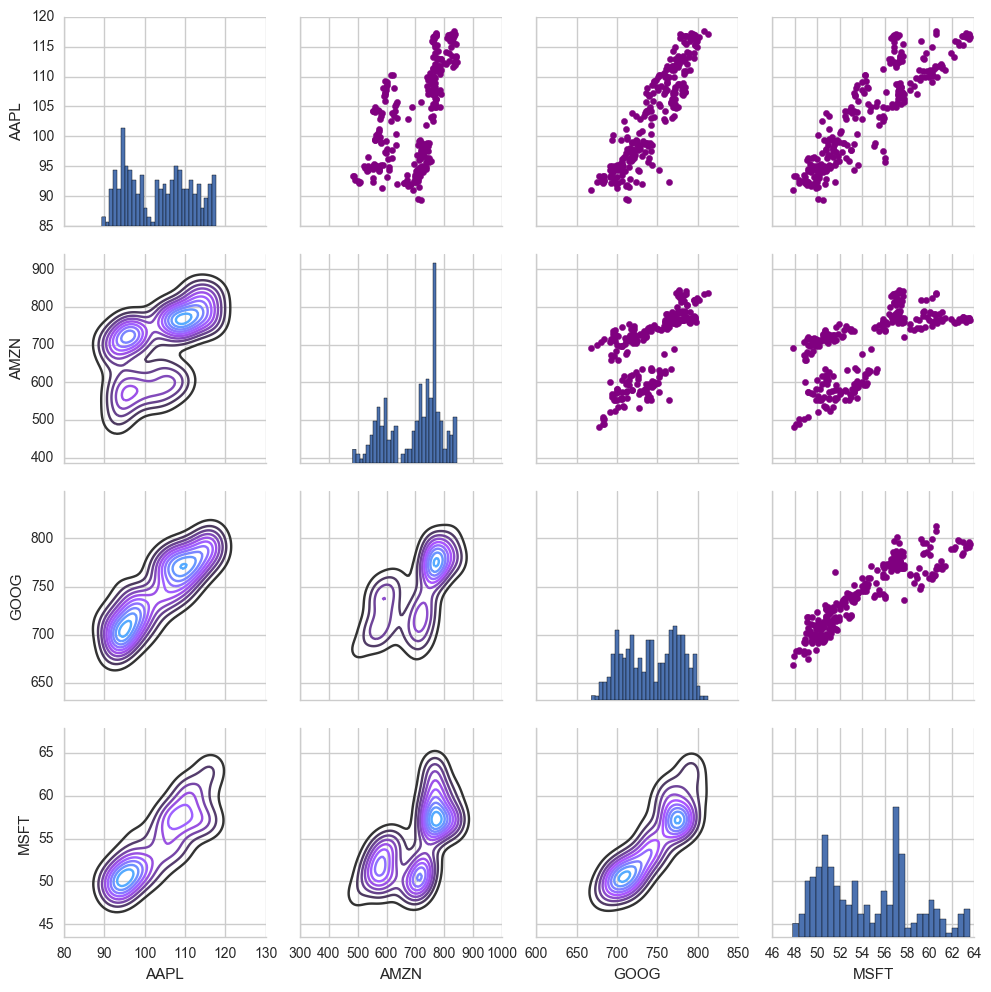

In [20]:
# correlation of closing price
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

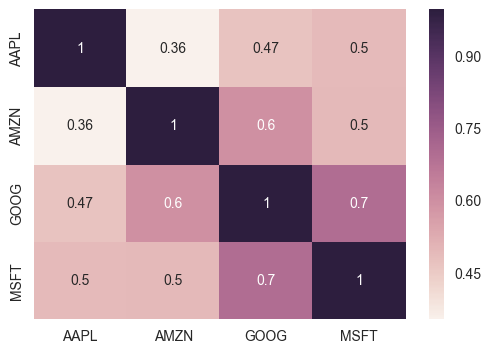

In [21]:
# use seaborn for a quick correlation plot for daily returns
sns.heatmap(tech_ret.dropna().corr(), annot=True)

As we suspected from the PairPlot before, the relationship between GOOG and MSFT is the strongest which is shown numerically above.

All the stocks are positively correlated.

### Risk Analysis

There are a number of ways to quantify risks and one of the most basic ways is to compare the expected return with the standard deviation of the daily returns.

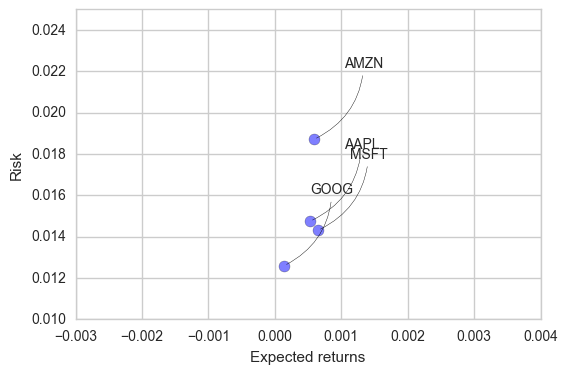

In [22]:
# define a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_ret.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

# set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

# set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# label the scatter plots
# reference: http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk
We can treat value at risk(VaR) as the amount of money we could expect to lose for a given confidence interval. There are several methods we can use for estimating VaR. Let's go ahead and see some of them in action.

1) VaR using 'Bootstrap' method

For this method we will calculate the empirical quantiles from a histogram of daily returns. 

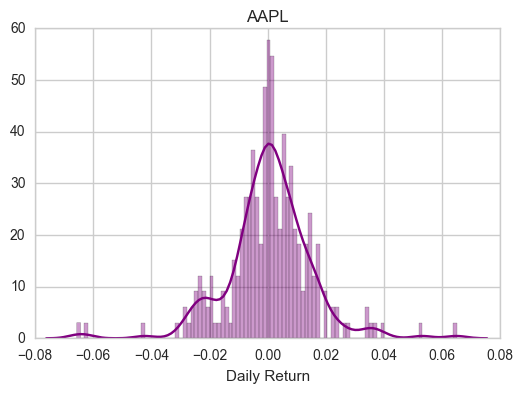

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
plt.title('AAPL')

Use quantile to get the risk value for the stock.

In [24]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.02307231215248655

The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence, our worst daily loss will not exceed 2.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.023 * 1,000,000 = $23,000.

#### 2) VaR using Monte Carlo 

We will use the geometric Brownian motion (GBM) to simulate the stock prices. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First, define the variables we will be using the Google DataFrame GOOG.

In [25]:
# set up time horizon
days = 365

# delta
dt = 1/days

# grab the mu(drift) from the expected return data got from GOOG
mu = rets.mean()['GOOG']

# grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

A function that takes in the starting price, number of days, mu and sigma is created to simulate one evolution.

In [26]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    """ 
    This function takes in starting stock price, days of simulation,mu,sigma, and 
    returns simulated price array
    
    """
    
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    # shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # run price array fro number of days
    for x in xrange(1,days):
        
        # calculate shock
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        # calculate drift
        drift[x] = mu*dt
        # calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

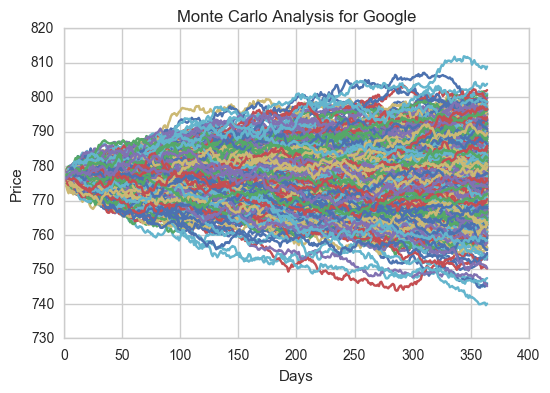

In [27]:
# get start price from GOOG.head()
start_price = GOOG['Open'][0]

# number of stock evolutions
runs = 1000

for run in xrange(runs):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

# plot 
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Get a histogram of the end result for a much larger run.

In [28]:
# a larger number of runs
runs = 10000

# create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):
    # set the simulation data point as the last stock price
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

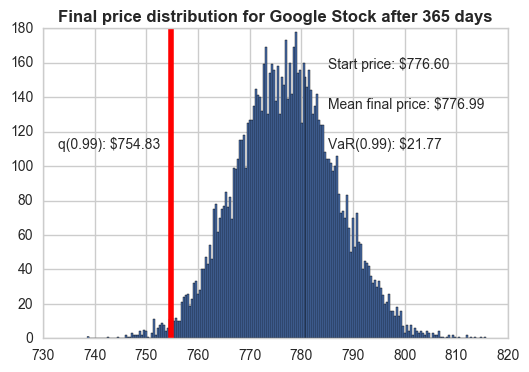

In [29]:
# define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# plot the distribution of the end prices
plt.hist(simulations, bins=200)

# use plt.figtext to fill in some additional information onto the plot

# start price
plt.figtext(0.6, 0.8, "Start price: $%.2f" % start_price)

# mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

It shows that the 1% empirical quantile of the final price distribution to estimate the VaR for the Google stock is 22.17 for every investment of 766.69 (the price of one inital Google stock).

This means for every initial stock you purchase, you are putting about $22.17 at risk 99% of the time from our Monte Carlo Simulation.